In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf
!pip install statsmodels==0.12.1
!pip install finance-datareader
!pip install pmdarima

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-12-01 06:40:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 06:40:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 06:40:49--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import tensorflow as tf
import keras
from numpy import array
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import urllib.request
import json
import datetime
import os
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
#import rcParams rcParams['figure.figsize']=20,10 from tensorflow.keras.models 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
stock_list = pd.read_csv('/content/gdrive/MyDrive/stock/stock_list.csv', encoding='utf-8')
sample_name = pd.read_csv('/content/gdrive/MyDrive/stock/sample_submission.csv', encoding='utf-8')
snp = pd.read_csv('/content/gdrive/MyDrive/AI/S&P 500 내역.csv', thousands = ',', encoding='utf-8')
nas = pd.read_csv('/content/gdrive/MyDrive/AI/나스닥종합지수 내역.csv', thousands = ',', encoding='utf-8')
cv1 = pd.read_csv('/content/gdrive/MyDrive/AI/covid-testing.csv')
cv2 = pd.read_csv('/content/gdrive/MyDrive/AI/covid_us_county.csv')
cv2 = cv2.rename(columns={'date':'Date'})

## cv1 : 일별 누적 확진자수

In [ ]:
cv1 = cv1[cv1['ISO code']=='USA'][['Date', 'Daily change in cumulative total']]
cv1

,Date,Daily change in cumulative total
69243,2020-03-01,348.0
69244,2020-03-02,513.0
69245,2020-03-03,619.0
69246,2020-03-04,887.0
69247,2020-03-05,1201.0
...,...,...
69863,2021-11-11,1488182.0
69864,2021-11-12,1236651.0
69865,2021-11-13,846398.0
69866,2021-11-14,432621.0


## cv1 : 시계열분해

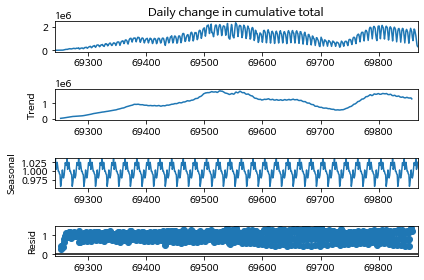

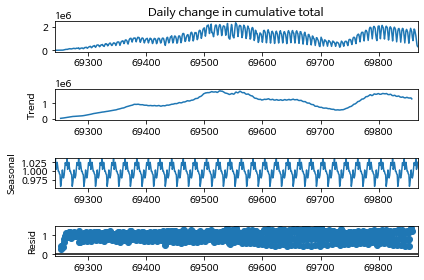

In [ ]:
decomposition = seasonal_decompose(cv1['Daily change in cumulative total'], model='multiplicative',period=20) 
cv1['daily_trend'] = decomposition.trend.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 추세 
cv1['daily_seosonal'] = decomposition.seasonal.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 계절성 
cv1['daily_resid'] = decomposition.resid.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 잔차
decomposition.plot()

In [ ]:
cv1

,Date,Daily change in cumulative total,daily_trend,daily_seosonal,daily_resid
69243,2020-03-01,348.0,17959.45,1.016567,0.281069
69244,2020-03-02,513.0,17959.45,1.035472,0.281069
69245,2020-03-03,619.0,17959.45,1.005030,0.281069
69246,2020-03-04,887.0,17959.45,1.010391,0.281069
69247,2020-03-05,1201.0,17959.45,1.025436,0.281069
...,...,...,...,...,...
69863,2021-11-11,1488182.0,1301535.55,1.016567,1.219495
69864,2021-11-12,1236651.0,1301535.55,1.035472,1.219495
69865,2021-11-13,846398.0,1301535.55,1.005030,1.219495
69866,2021-11-14,432621.0,1301535.55,1.010391,1.219495


## cv2 : 일별 사망자수

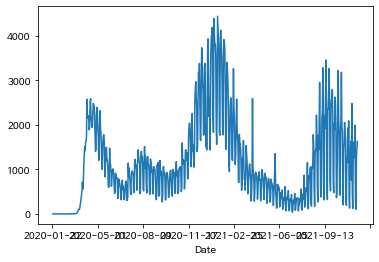

In [ ]:
cv2['daily'] = 0
temp = cv2.groupby('Date').sum()
temp['daily'] = (cv2.groupby('Date').sum()['deaths'].shift(-1)-cv2.groupby('Date').sum()['deaths']).shift(+1)
cv2 = temp
cv2['daily'].plot()

In [ ]:
cv2 = cv2.reset_index()
cv2 = cv2[cv2['Date'] > '2020-02-29']
cv2 = cv2[['Date', 'daily']]
cv2

,Date,daily
39,2020-03-01,0.0
40,2020-03-02,5.0
41,2020-03-03,1.0
42,2020-03-04,4.0
43,2020-03-05,1.0
...,...,...
668,2021-11-20,322.0
669,2021-11-21,105.0
670,2021-11-22,1226.0
671,2021-11-23,1426.0


## cv2 : 시계열분해

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


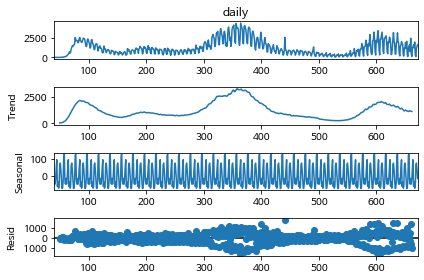

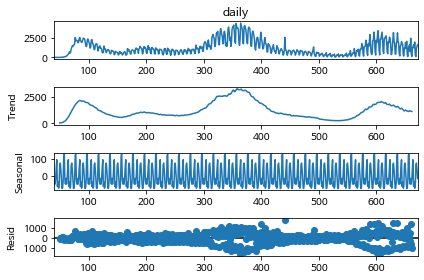

In [ ]:
decomposition = seasonal_decompose(cv2['daily'], model='additive',period=20) 
cv2['death_trend'] = decomposition.trend.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 추세 
cv2['death_seosonal'] = decomposition.seasonal.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 계절성 
cv2['death_resid'] = decomposition.resid.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 잔차
decomposition.plot()

In [ ]:
cv1['Date'] = pd.to_datetime(cv1['Date'])
cv2['Date'] = pd.to_datetime(cv2['Date'])

## 영업일 데이터

In [ ]:
start_date = '20200104'
end_date = '20211123'

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}', )
display(Business_days.head())

WEEKDAY of "start_date" : 5
NUM of WEEKS to "end_date" : 47
HOW MANY "Business_days" : (492, 1)


,Date
0,2020-01-06
1,2020-01-07
2,2020-01-08
3,2020-01-09
4,2020-01-10


## nas : 나스닥 지수

In [ ]:
def year2hypen(x):
  date = x.split()
  year = date[0][:4]
  month = date[1][:2]
  day = date[2][:2]
  return year, month, day

nas['날짜']= nas['날짜'].map(year2hypen)

def to_dt(tpl):
    tpl_dt = datetime.datetime.strptime('-'.join(str(x) for x in tpl), '%Y-%m-%d').strftime('%Y-%m-%d')
    return tpl_dt

nas.loc[:, '날짜'] = nas.날짜.apply(func = to_dt)

nas = nas.sort_values('날짜', ascending=True).reset_index(drop=True)

nas['날짜']=pd.to_datetime(nas['날짜'])
nas

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-02,9092.2,9039.5,9093.4,9010.9,654.95M,1.33%
1,2020-01-03,9020.8,8976.4,9065.8,8976.4,618.55M,-0.79%
2,2020-01-06,9071.5,8943.5,9072.4,8943.5,690.23M,0.56%
3,2020-01-07,9068.6,9076.7,9091.9,9042.5,552.23M,-0.03%
4,2020-01-08,9129.2,9068.0,9168.9,9059.4,595.81M,0.67%
...,...,...,...,...,...,...,...
474,2021-11-17,15921.6,15973.6,15998.6,15909.4,966.81M,-0.33%
475,2021-11-18,15993.7,15973.4,16010.9,15848.8,1.08B,0.45%
476,2021-11-19,16057.4,16042.2,16121.1,16017.2,1.02B,0.40%
477,2021-11-22,15854.8,16120.9,16212.2,15851.0,1.13B,-1.26%


## snp : S&P500 지수

In [ ]:
def year2hypen(x):
  date = x.split()
  year = date[0][:4]
  month = date[1][:2]
  day = date[2][:2]
  return year, month, day

snp['날짜']= snp['날짜'].map(year2hypen)

def to_dt(tpl):
    tpl_dt = datetime.datetime.strptime('-'.join(str(x) for x in tpl), '%Y-%m-%d').strftime('%Y-%m-%d')
    return tpl_dt

snp.loc[:, '날짜'] = snp.날짜.apply(func = to_dt)

snp = snp.sort_values('날짜', ascending=True).reset_index(drop=True)

snp['날짜']=pd.to_datetime(snp['날짜'])
snp

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-02,3257.85,3244.67,3258.14,3235.53,-,0.84%
1,2020-01-03,3234.85,3226.36,3246.15,3222.34,-,-0.71%
2,2020-01-06,3246.28,3217.55,3246.84,3214.64,-,0.35%
3,2020-01-07,3237.18,3241.86,3244.91,3232.43,-,-0.28%
4,2020-01-08,3253.05,3238.59,3267.07,3236.67,-,0.49%
...,...,...,...,...,...,...,...
474,2021-11-17,4688.67,4701.50,4701.50,4684.41,-,-0.26%
475,2021-11-18,4706.64,4700.72,4708.75,4672.78,-,0.38%
476,2021-11-19,4697.96,4708.44,4717.75,4694.22,-,-0.18%
477,2021-11-22,4682.95,4712.00,4743.83,4682.17,-,-0.32%


## 예측 종목 : 넷플릭스, 아마존, 아메리칸 에어라인, BP

[06:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:633.576
Will train until validation_0-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:15.3283
[200]	validation_0-mae:14.2831
[300]	validation_0-mae:13.7462
Stopping. Best iteration:
[290]	validation_0-mae:13.7254



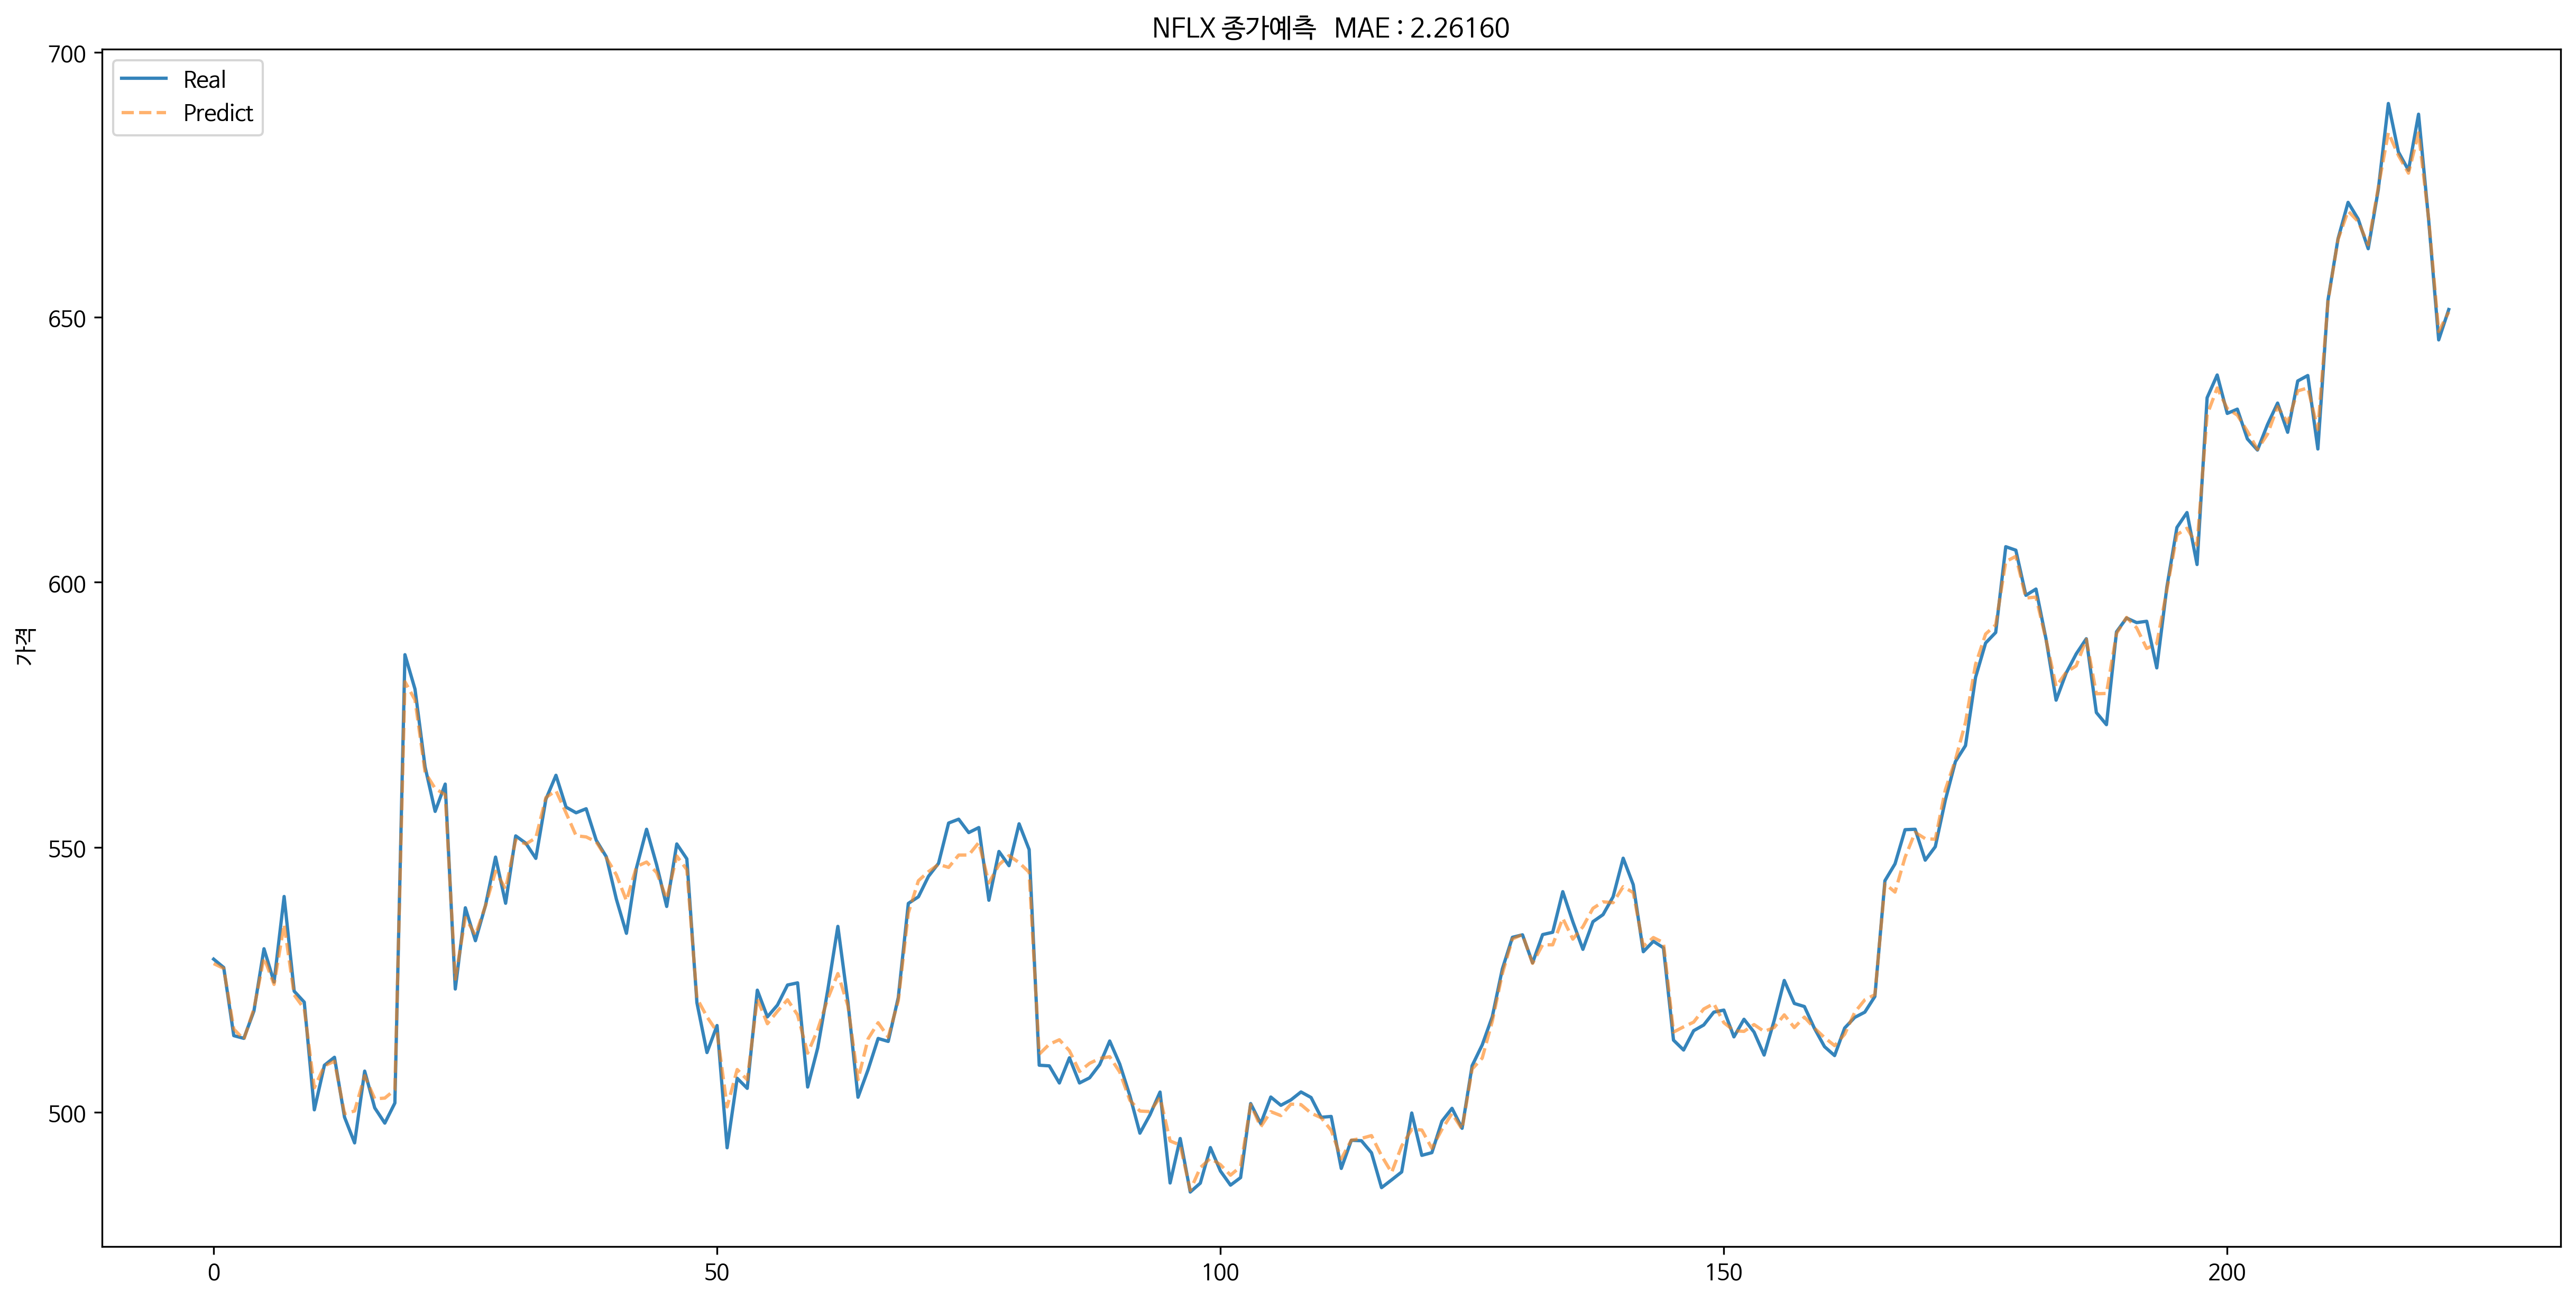

NFLX미래예측결과
[649.4007  647.9543  651.21796 639.3189  651.8953 ]
Date
2021-11-09    655.99
2021-11-10    646.91
2021-11-11    657.58
2021-11-12    682.61
2021-11-15    679.33
Name: Close, dtype: float64
[06:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:3354.66
Will train until validation_0-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:72.3645
[200]	validation_0-mae:38.8212
[300]	validation_0-mae:37.0728
Stopping. Best iteration:
[279]	validation_0-mae:36.9277



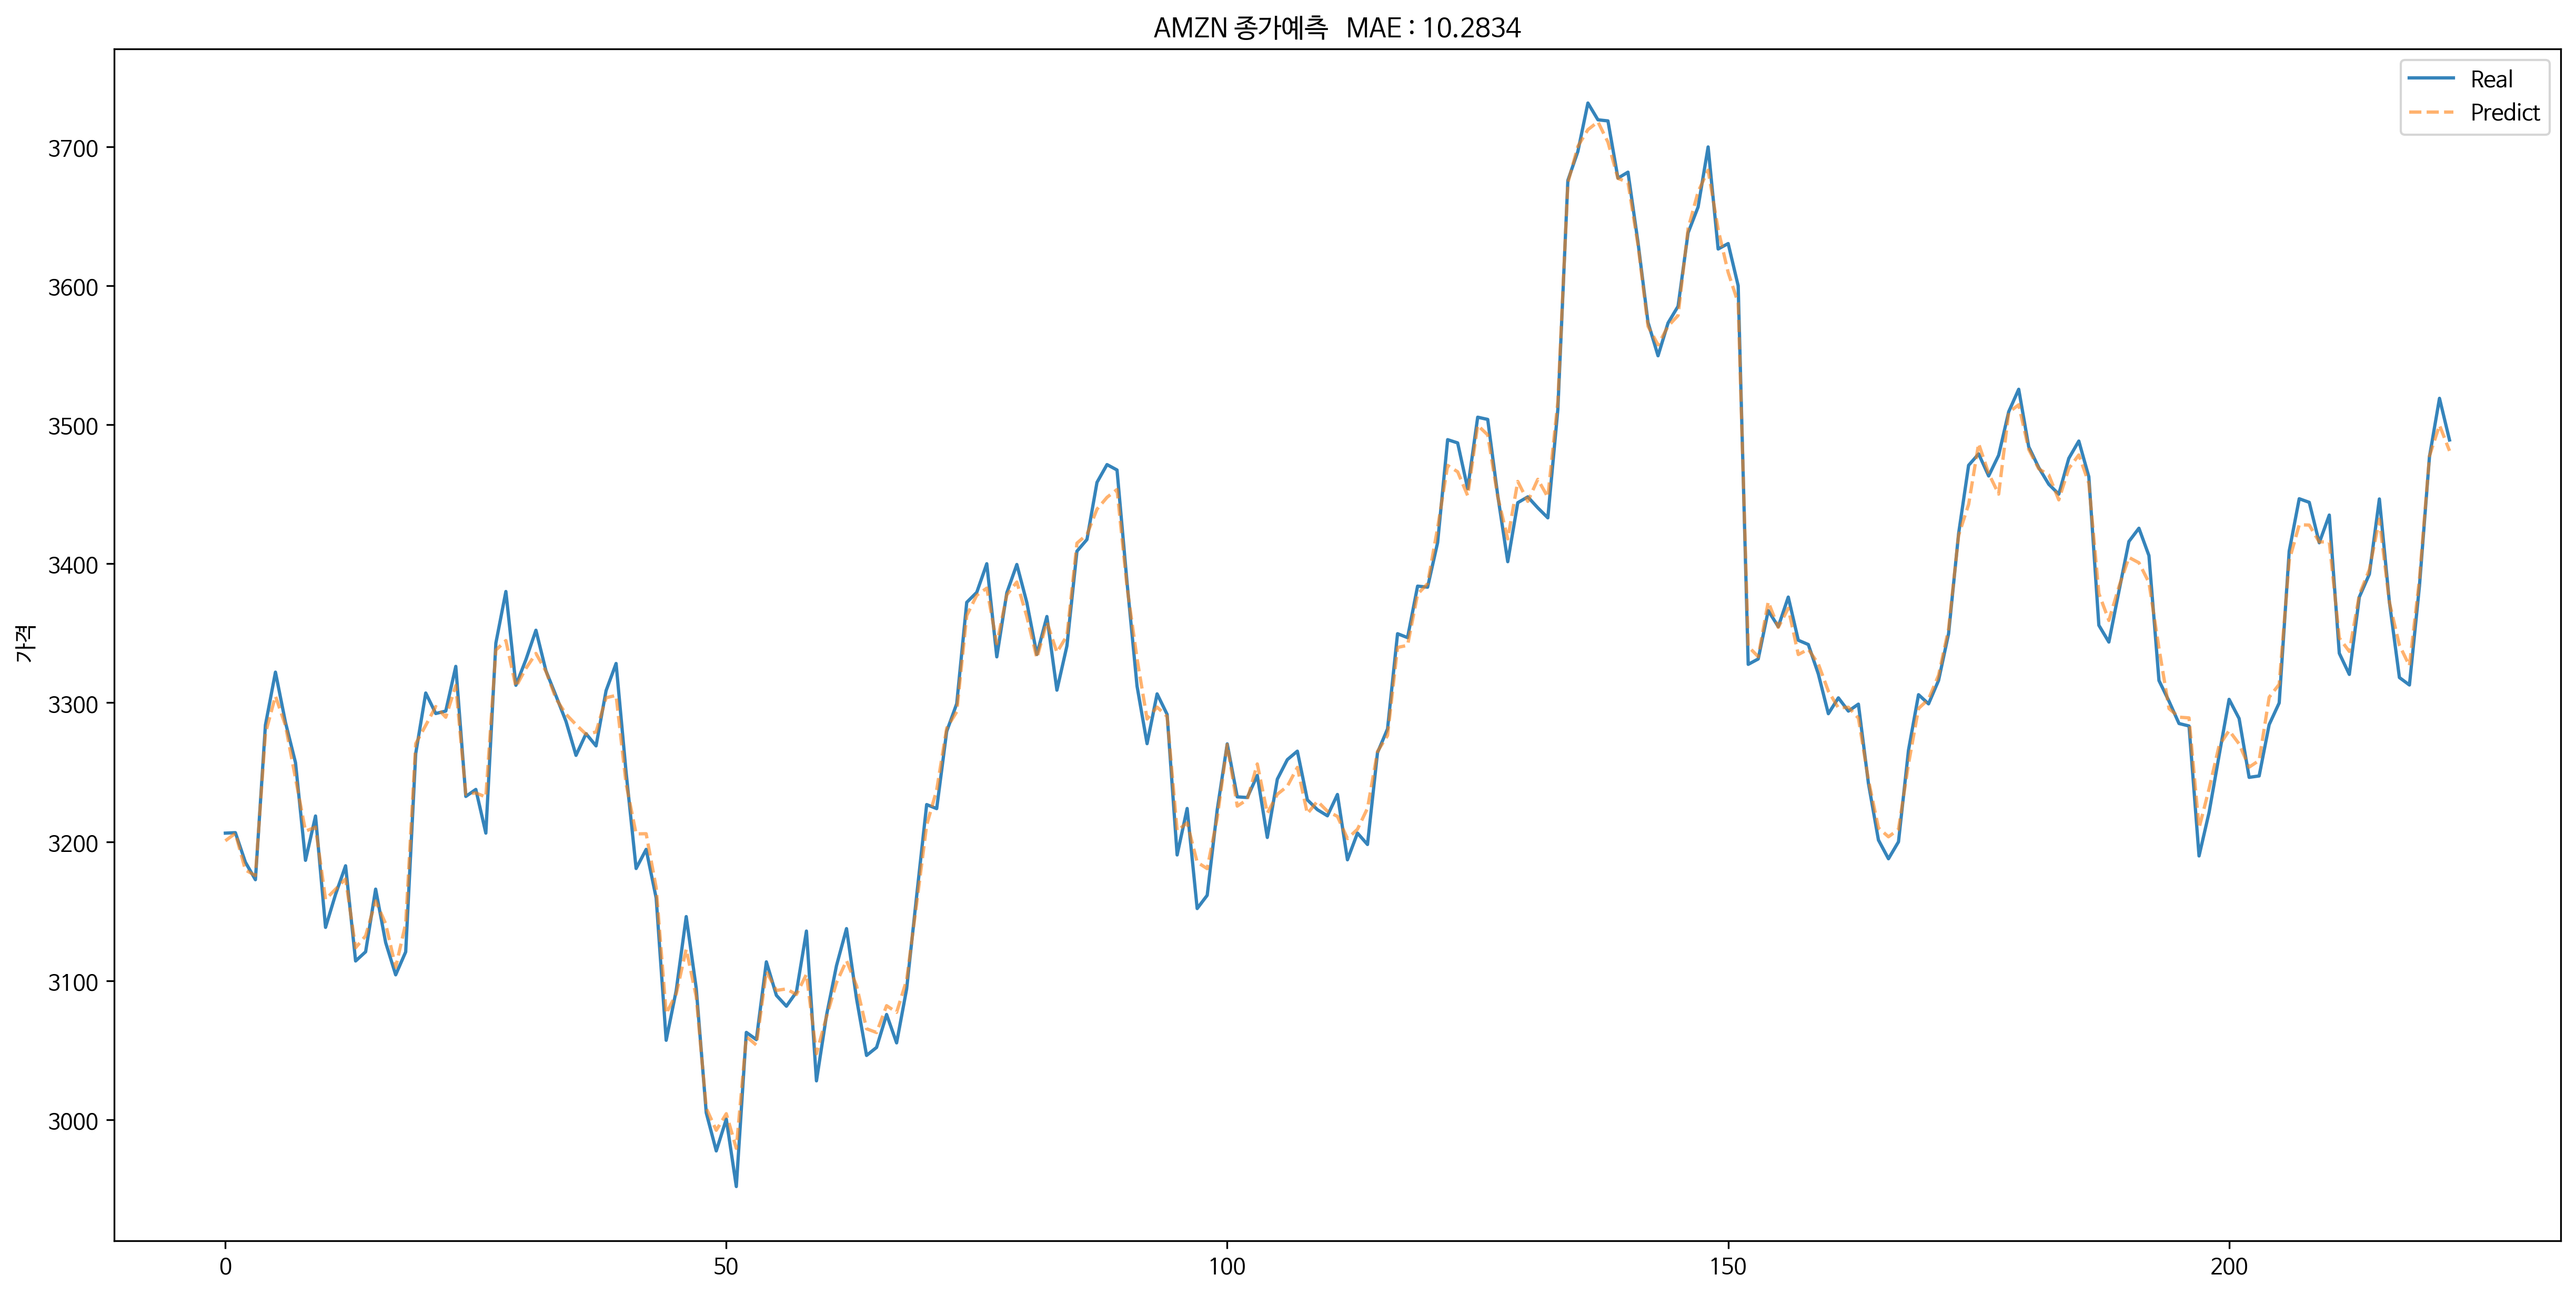

AMZN미래예측결과
[3521.3171 3501.7114 3511.1106 3501.8743 3517.4763]
Date
2021-11-09    3576.23
2021-11-10    3482.05
2021-11-11    3472.50
2021-11-12    3525.15
2021-11-15    3545.68
Name: Close, dtype: float64
[06:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:19.6148
Will train until validation_0-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.01764
[200]	validation_0-mae:1.01074
Stopping. Best iteration:
[151]	validation_0-mae:0.933783



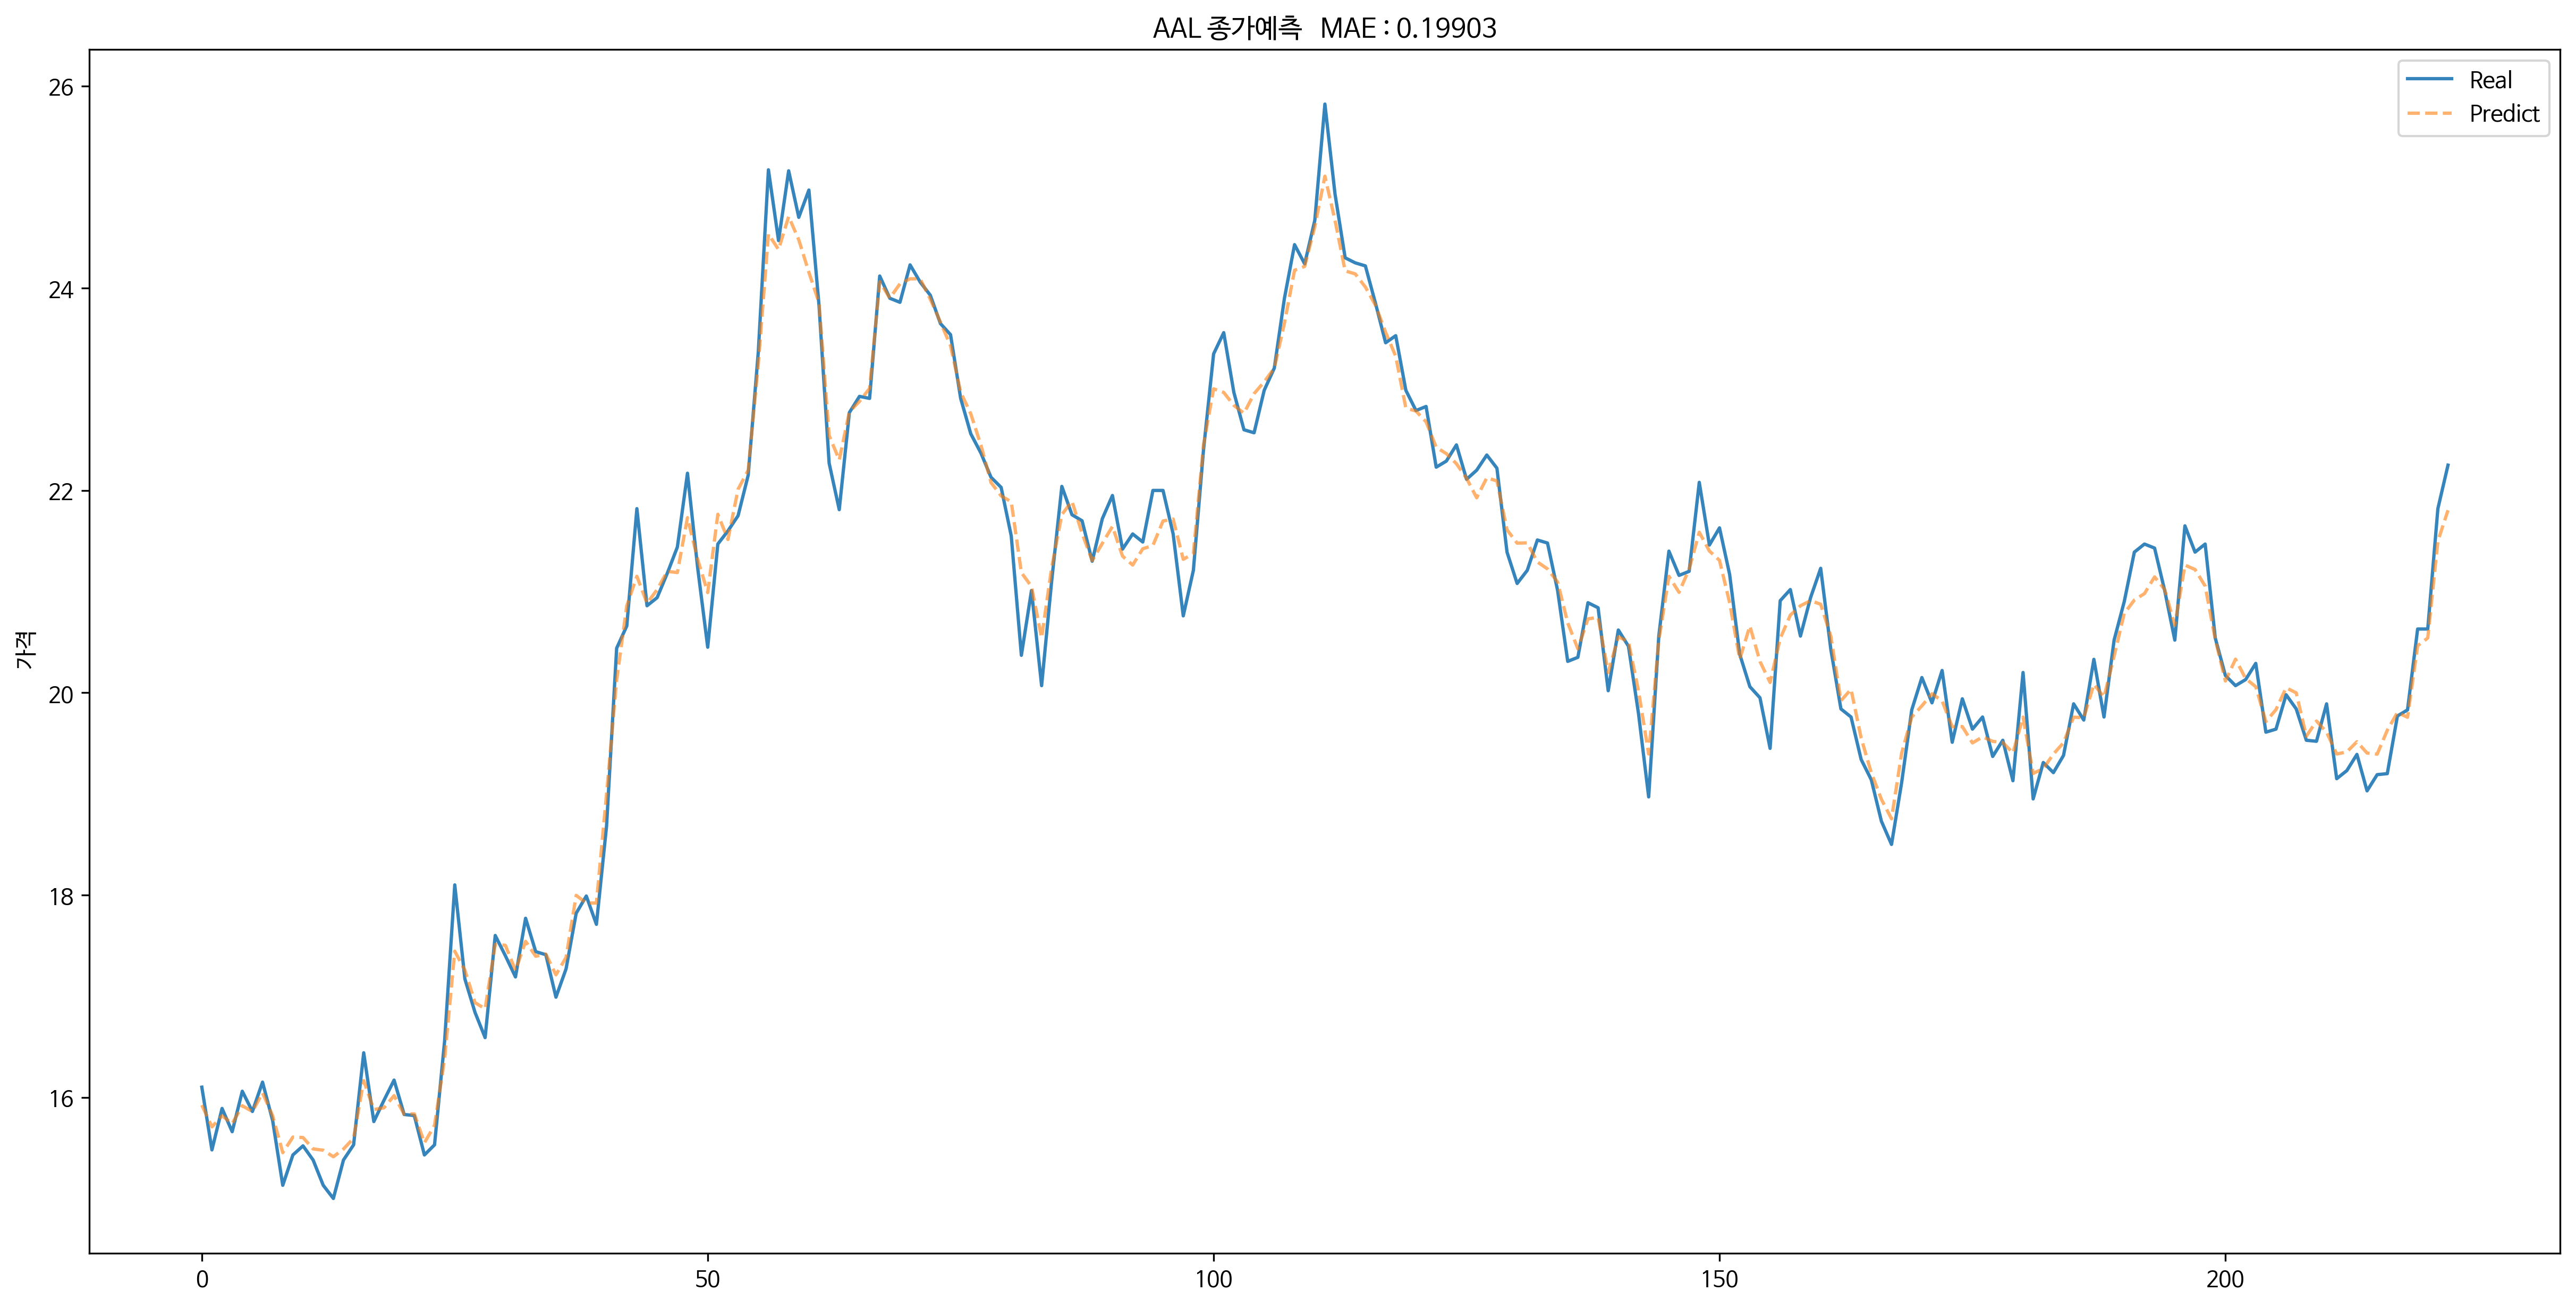

AAL미래예측결과
[21.930662 21.167723 20.935873 21.174206 21.059837]
Date
2021-11-09    22.26
2021-11-10    21.57
2021-11-11    21.33
2021-11-12    20.29
2021-11-15    20.32
Name: Close, dtype: float64
[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:25.8512
Will train until validation_0-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:0.258313
[200]	validation_0-mae:0.234878
Stopping. Best iteration:
[112]	validation_0-mae:0.195485



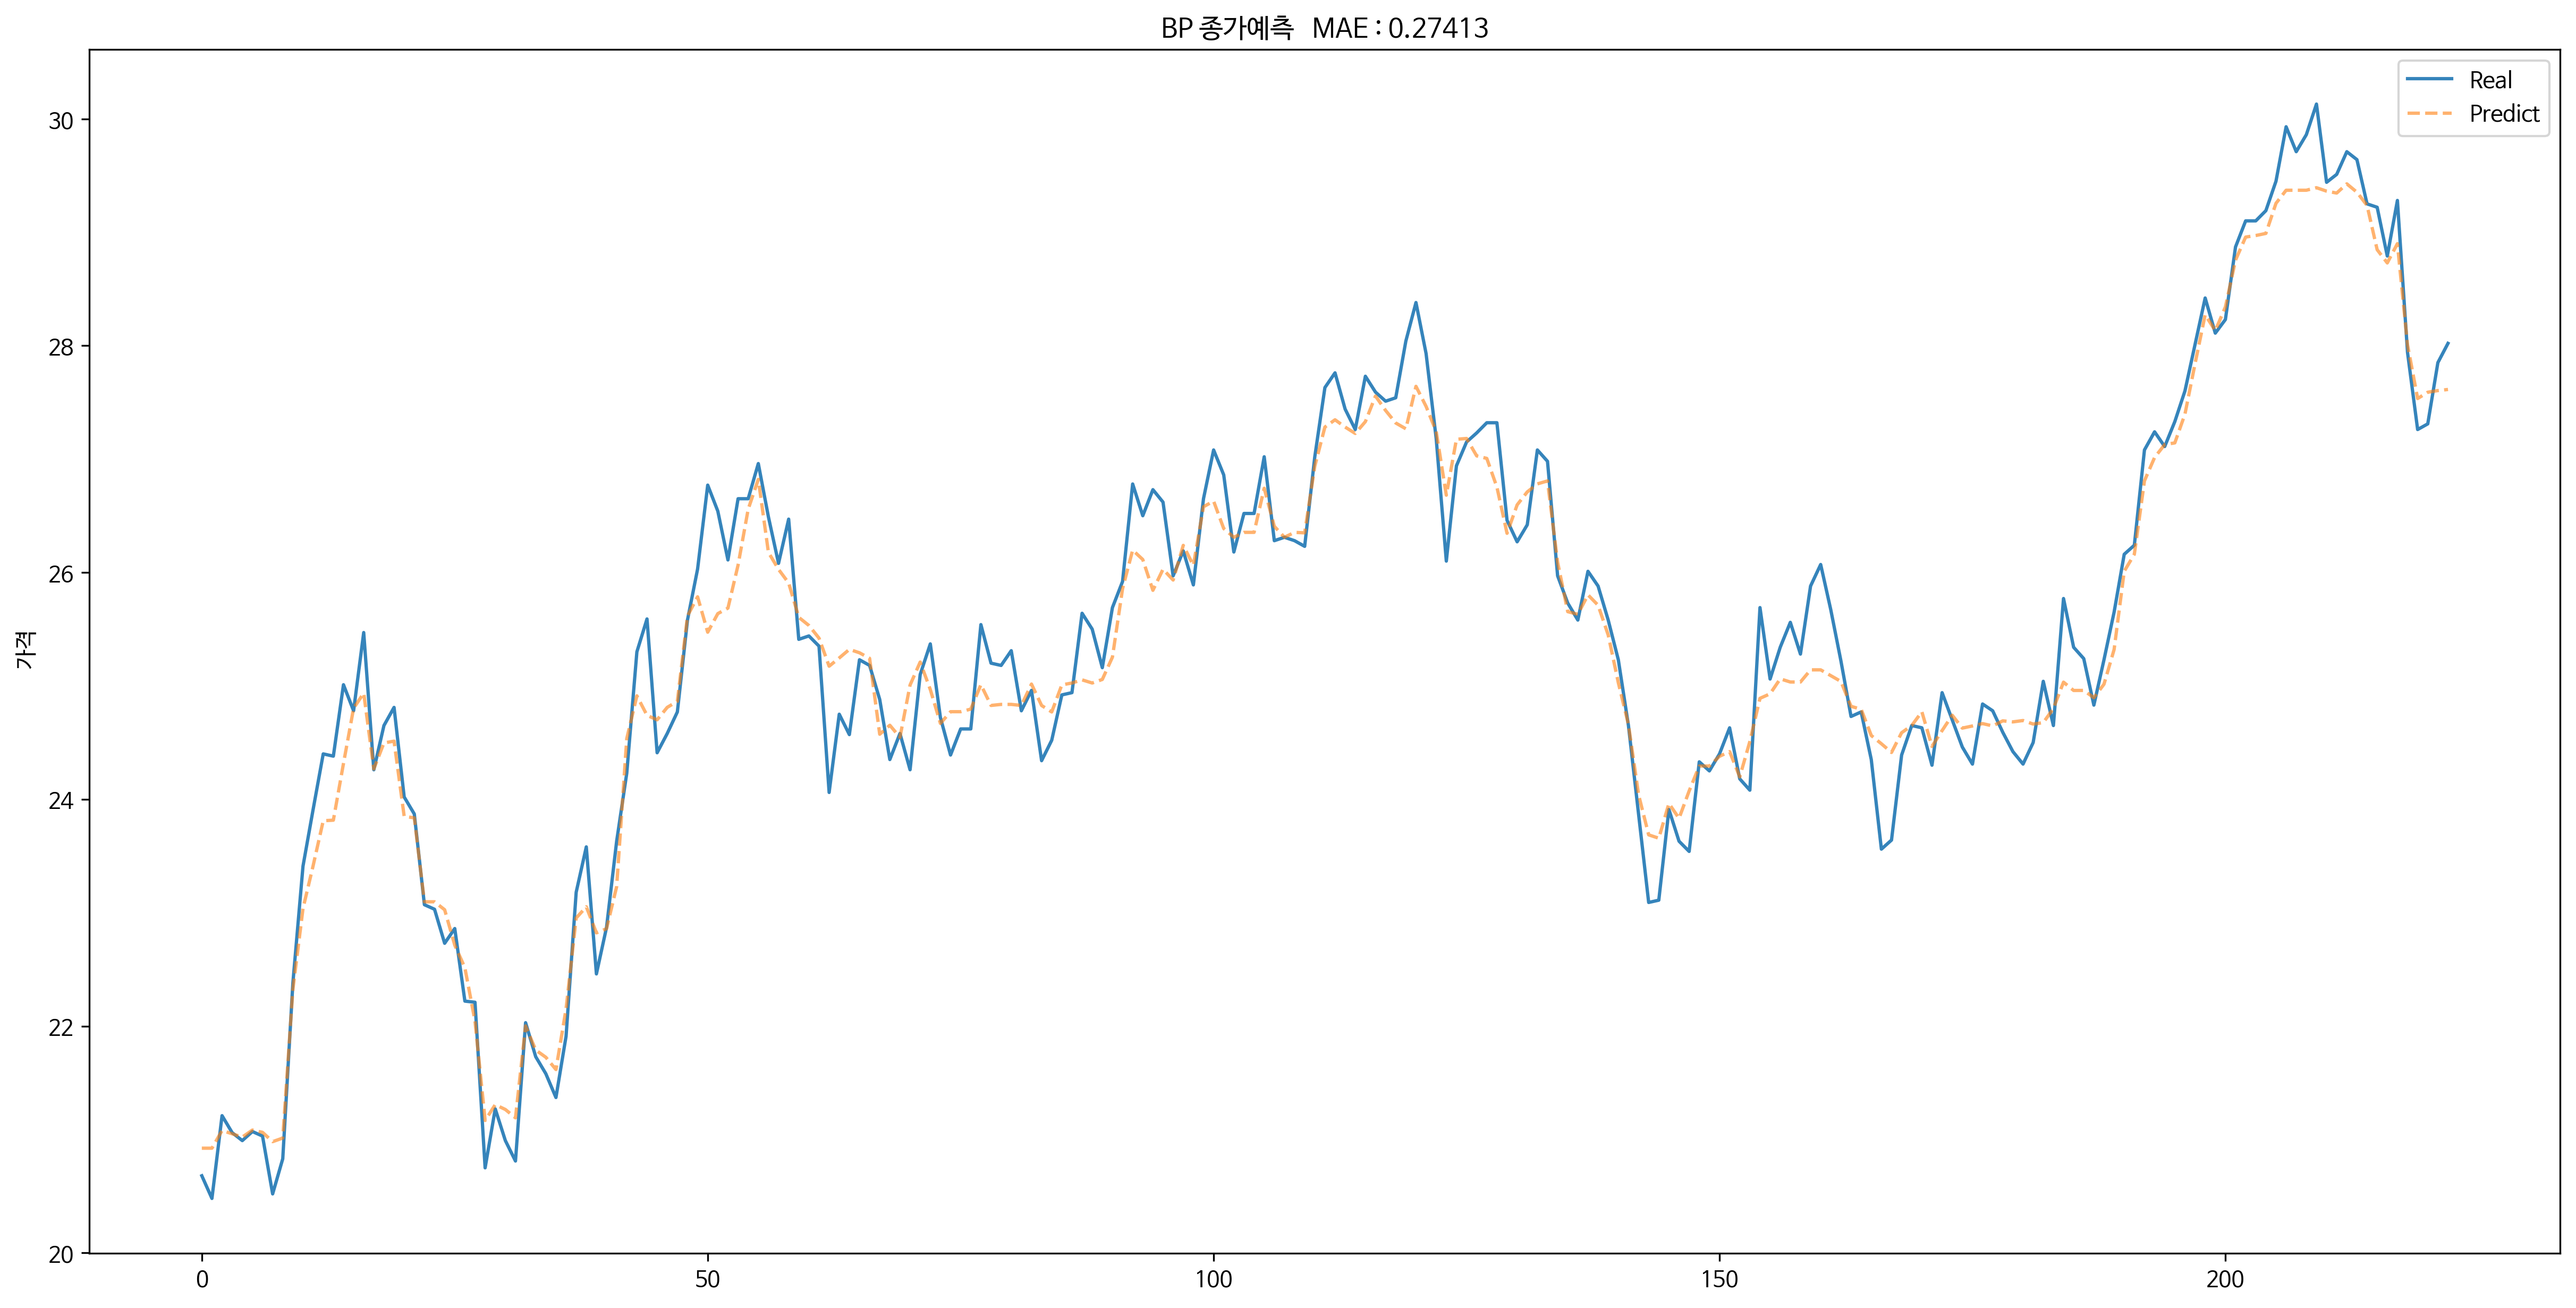

BP미래예측결과
[27.444422 27.406775 27.550741 27.523273 27.535938]
Date
2021-11-09    28.20
2021-11-10    27.42
2021-11-11    27.41
2021-11-12    27.38
2021-11-15    27.55
Name: Close, dtype: float64


In [ ]:
stock_code = ['NFLX', 'AMZN', 'AAL', 'BP']

for i in stock_code:

  #주가 데이터 받아올 날짜
  start_date = '20200104'
  end_date = '20211123'
  sample_code = i
  sample = fdr.DataReader(sample_code, start = start_date, end = end_date).reset_index()
  sample = pd.merge(Business_days, sample, how = 'outer')
  sample = sample.dropna(axis=0)
  #코로나 데이터랑 주가 데이터 합침
  sample = pd.merge(sample, cv1, how='inner', left_on='Date', right_on='Date')
  sample = pd.merge(sample, cv2, how='inner', left_on='Date', right_on='Date')
  sample = pd.merge(sample, nas, how='left', left_on='Date', right_on='날짜')
  sample = pd.merge(sample, snp, how='left', left_on='Date', right_on='날짜')
  stock_data = sample
  #주말 정보
  stock_data['Weekday'] = stock_data['Date'].dt.weekday
  stock_data = stock_data.set_index('Date') 
  #주식 종가의 시계열 분해
  decomposition = seasonal_decompose(stock_data['Close'], model='multiplicative',period=20) 
  stock_data['Close_trend'] = decomposition.trend.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 추세 
  stock_data['Close_seosonal'] = decomposition.seasonal.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 계절성 
  stock_data['Close_resid'] = decomposition.resid.fillna(method = 'ffill').fillna(method = 'bfill') # 종가 잔차

  feature_names = []
  #ma, rsi의 14일, 30일 50일 200일 구하는 코드
  for n in [14, 30, 50, 200]:
      stock_data['ma' + str(n)] = talib.SMA(np.array(list(map(float,stock_data['Close'].values))), timeperiod=n)
      stock_data['rsi' + str(n)] = talib.RSI(np.array(list(map(float,stock_data['Close'].values))), timeperiod=n)

      feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

  sample = stock_data.dropna(axis=0).sort_values('Date')

  #필요없는 feature drop
  sample = sample.drop(['날짜_x', '거래량_x', '변동 %_x', '날짜_y', '거래량_y', '변동 %_y'], axis=1)

  #타겟은 5영업일 후 종가 (일주일 후 종가 예측)
  sample['target'] = sample['Close'].shift(-5)

  data = sample

  train = data[:-10] # 2021년 1월 04일 ~ 2021년 11월 9일까지의 데이터로
  test = data[-10:] # 2021년 11월 23일 ~ 2021년 11월 30일까지의 데이터를 학습한다.

  X_train = train.drop(columns = ['target'])
  y_train = train['target']
  X_valid = test[:5].drop(columns = ['target'])
  y_valid = test[:5]['target']
  X_test = test[5:].drop(columns = ['target'])  

  xgb = XGBRegressor(n_estimators= 10000, learning_rate = 0.05, tree_method = 'gpu_hist')
  xgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], early_stopping_rounds = 100, eval_metric = 'mae', verbose = 100)

  y_pred = xgb.predict(X_train)

  # 평가지표 MAE
  MAE = mean_absolute_error(y_train, y_pred)
  # 그래프 생성
  plt.figure(figsize=(20, 10), dpi=300)
  plt.title(i + ' 종가예측' + '   MAE : ' + str(MAE)[:7])
  plt.ylabel(' 가격')
  plt.plot(y_train.values, alpha = 0.9, label = 'Real')
  plt.plot(y_pred, alpha = 0.6, linestyle = "--", label = 'Predict')
  plt.legend()
  plt.show()

  y_future = xgb.predict(X_test)
  print(i + '미래예측결과')
  print(y_future)
  print(test[5:]['Close'])
